In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
(train_data,train_labels),(test_data,test_labels) = keras.datasets.imdb.load_data(num_words=50000)

In [3]:
x = np.concatenate((train_data,test_data),axis=0)
y = np.concatenate((train_labels,test_labels),axis=0)

x_train = x[:30000]
x_val = x[30000:40000]
x_test = x[40000:]

y_train = y[:30000]
y_val = y[30000:40000]
y_test = y[40000:]

In [4]:
word_index = keras.datasets.imdb.get_word_index()

In [5]:
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNKN>"] = 2
word_index["<UNUSED>"] = 3

In [6]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [7]:
def decode_review(text):
    return " ".join( [reverse_word_index.get(i,"?") for i in text] )

In [8]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train,value=word_index["<PAD>"],padding="post",maxlen=500)
x_val = keras.preprocessing.sequence.pad_sequences(x_val,value=word_index["<PAD>"],padding="post",maxlen=500)
x_test = keras.preprocessing.sequence.pad_sequences(x_test,value=word_index["<PAD>"],padding="post",maxlen=500)

In [9]:
model = keras.Sequential()
model.add(keras.layers.Embedding(50000,16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16,activation='relu'))
model.add(keras.layers.Dropout(0.05))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
hist = model.fit(x_train, y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val), verbose=1)

Epoch 1/9
59/59 [==============================] - 4s 49ms/step - loss: 0.6925 - accuracy: 0.5263 - val_loss: 0.6885 - val_accuracy: 0.6537
Epoch 2/9
59/59 [==============================] - 2s 34ms/step - loss: 0.6843 - accuracy: 0.6782 - val_loss: 0.6684 - val_accuracy: 0.7497
Epoch 3/9
59/59 [==============================] - 2s 34ms/step - loss: 0.6558 - accuracy: 0.7585 - val_loss: 0.6227 - val_accuracy: 0.7684
Epoch 4/9
59/59 [==============================] - 2s 34ms/step - loss: 0.5976 - accuracy: 0.7971 - val_loss: 0.5578 - val_accuracy: 0.7986
Epoch 5/9
59/59 [==============================] - 2s 35ms/step - loss: 0.5226 - accuracy: 0.8267 - val_loss: 0.4912 - val_accuracy: 0.8249
Epoch 6/9
59/59 [==============================] - 2s 35ms/step - loss: 0.4480 - accuracy: 0.8551 - val_loss: 0.4366 - val_accuracy: 0.8430
Epoch 7/9
59/59 [==============================] - 2s 35ms/step - loss: 0.3925 - accuracy: 0.8724 - val_loss: 0.3935 - val_accuracy: 0.8555
Epoch 8/9
59/59 [===

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

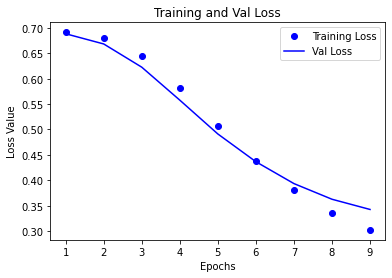

In [13]:
loss_values = hist.history['loss']
val_loss_values = hist.history['val_loss']
epochs = range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label='Training Loss')
plt.plot(epochs,val_loss_values,'b',label='Val Loss')
plt.title('Training and Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

In [14]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3334 - accuracy: 0.8782


[0.333393394947052, 0.8781999945640564]

In [15]:
results = model.predict(x_test)

In [16]:
y_pred = []
for i in range(len(results)):
    if(results[i][0]>.5):
        y_pred.append(1)
    else:
        y_pred.append(0)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4973
           1       0.90      0.85      0.88      5027

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

[[4487  486]
 [ 732 4295]]


In [19]:
model.save("model.h5")

In [20]:
import re

In [21]:
def encode_review(text):
    cleaned = [re.sub("[^a-zA-Z]","",token) for token in text.split() if (re.sub("[^a-zA-Z]","",token) is not "")]
    encoded = [1]

    for word in cleaned:
        if((word.lower() in word_index) and (word_index[word.lower()]<50000)):
            encoded.append(word_index[word.lower()])
        else:
            encoded.append(2)
    return encoded

In [23]:
with open("bad.txt",encoding='utf-8') as f:
    for line in f.readlines():
        encoded = encode_review(line)
        encoded = keras.preprocessing.sequence.pad_sequences([encoded],value=word_index["<PAD>"],padding="post",maxlen=500)
        test_pred = model.predict(np.array( encoded, ))
        print(line)
        print(encoded)
        print(test_pred[0])

There were no really memorable scenes in the movie, just two plus hours of corn, but I did enjoy watching George stumble drunkenly around the town after Uncle Billy’s disaster with the bank deposit. As soon as the wingless rescuer and meddler hits the scene, it was all downhill as Clarence poisoned every potentially good subsequent scene with his mere presence.
[[    1    50    71    57    66   906   139    11     4    20    43   107
    935   634     7  6247    21    13   122   358   149   742  7740 35423
    187     4   513   103  1697     2  1690    19     4  1982 17901    17
    515    17     4     2 48036     5     2  1936     4   136    12    16
     32  4451    17  8645 12716   175  4616    52  3691   136    19    27
   2691  1369     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0 